In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
data = pd.read_csv("Employee Exit Prediction.csv")

In [115]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [116]:
data.satisfaction_level.nunique()

92

In [117]:
data.shape

(14999, 10)

In [118]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [119]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [120]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [121]:
data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot: xlabel='left', ylabel='count'>

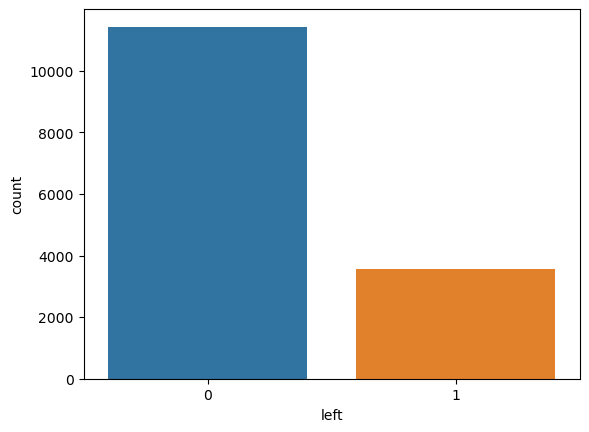

In [122]:
# how many purchase
sns.countplot(x ="left",data = data)

<AxesSubplot: xlabel='left', ylabel='count'>

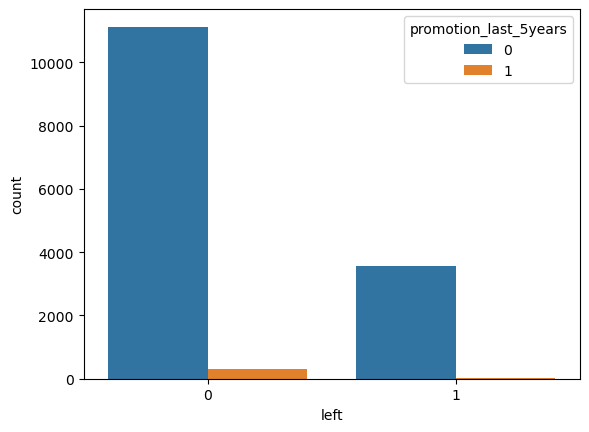

In [123]:
sns.countplot(x = "left",hue = "promotion_last_5years",data= data)

<AxesSubplot: title={'center': 'satisfaction_level'}, xlabel='left'>

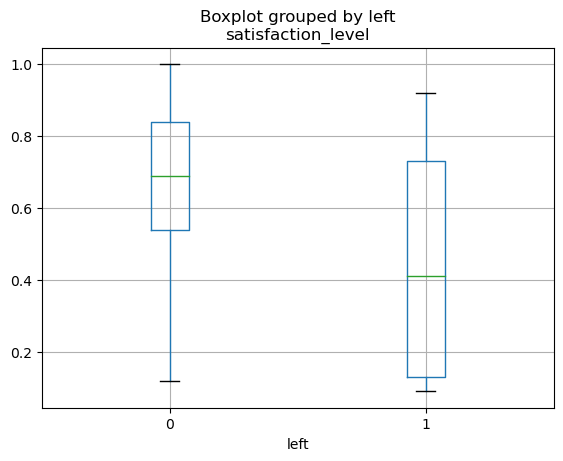

In [124]:






data.boxplot(column='satisfaction_level', by='left')

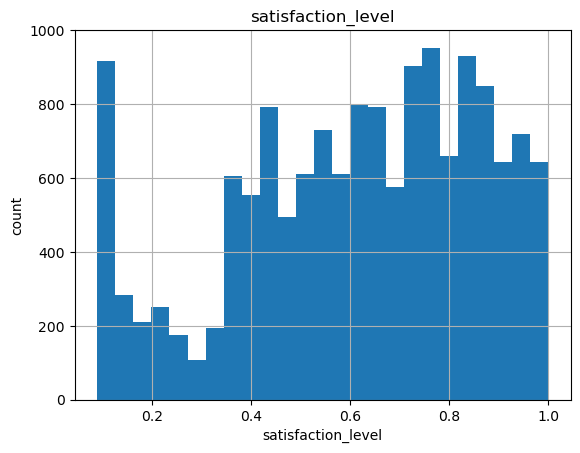

In [125]:
data["satisfaction_level"].hist(bins=25)
plt.xlabel("satisfaction_level")
plt.ylabel("count")
plt.title("satisfaction_level")
plt.show()

<AxesSubplot: title={'center': 'last_evaluation'}, xlabel='left'>

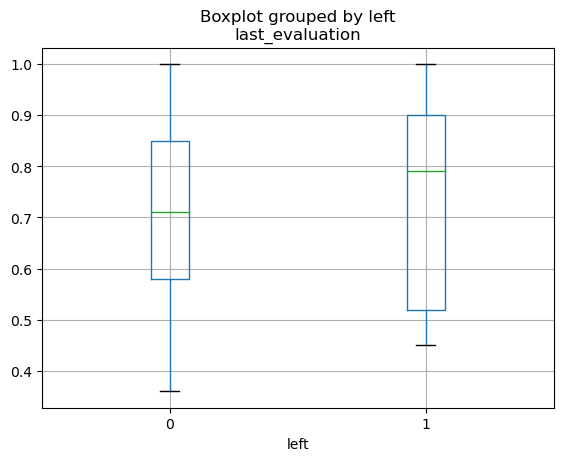

In [126]:
data.boxplot(column='last_evaluation', by="left")

<AxesSubplot: xlabel='left', ylabel='count'>

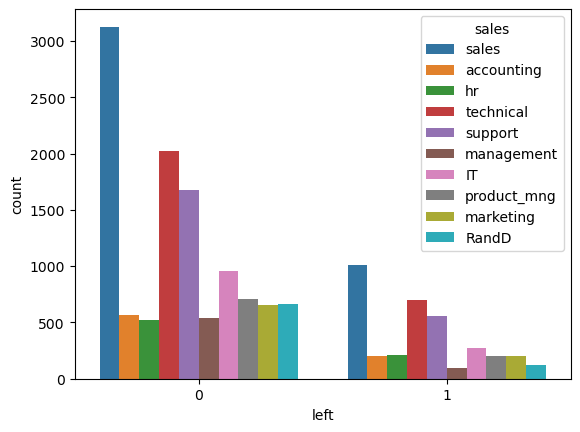

In [127]:
sns.countplot(x="left",hue ="sales", data= data)

<AxesSubplot: xlabel='left', ylabel='count'>

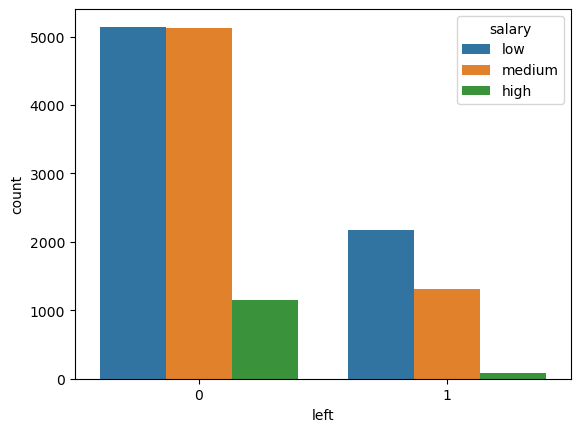

In [128]:
sns.countplot(x="left",hue ="salary", data= data)

<AxesSubplot: xlabel='left', ylabel='count'>

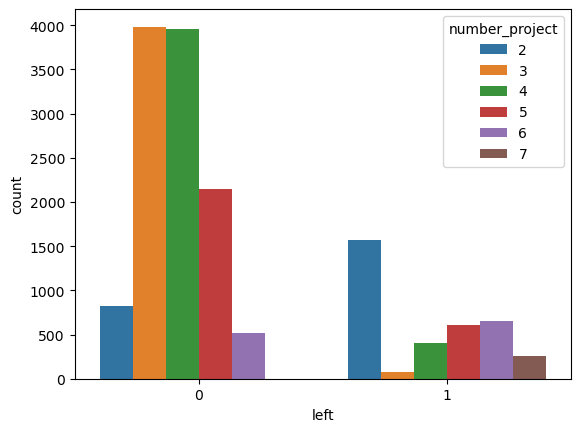

In [129]:
sns.countplot(x="left",hue ="number_project", data= data)

In [ ]:
sns.scatterplot(data=data, x="left", y="average_montly_hours")

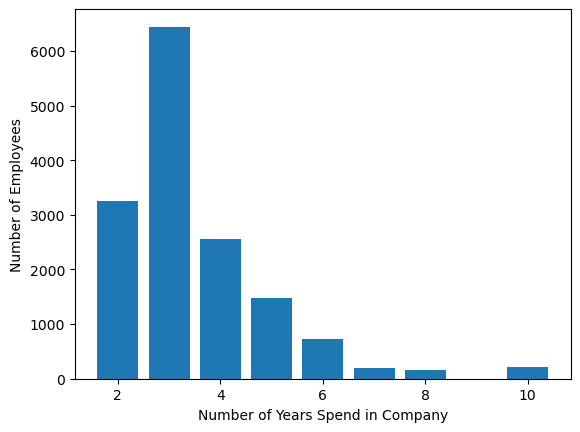

In [134]:
time_spent= data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

<AxesSubplot: xlabel='Work_accident', ylabel='count'>

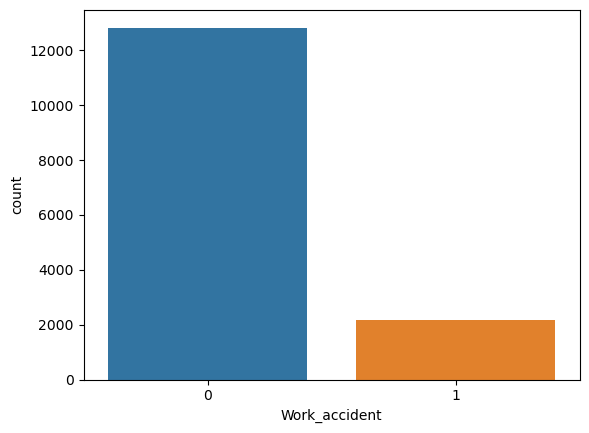

In [135]:
sns.countplot(x = "Work_accident",data= data)

C:\Users\pushk\AppData\Local\Temp\ipykernel_6128\255752276.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


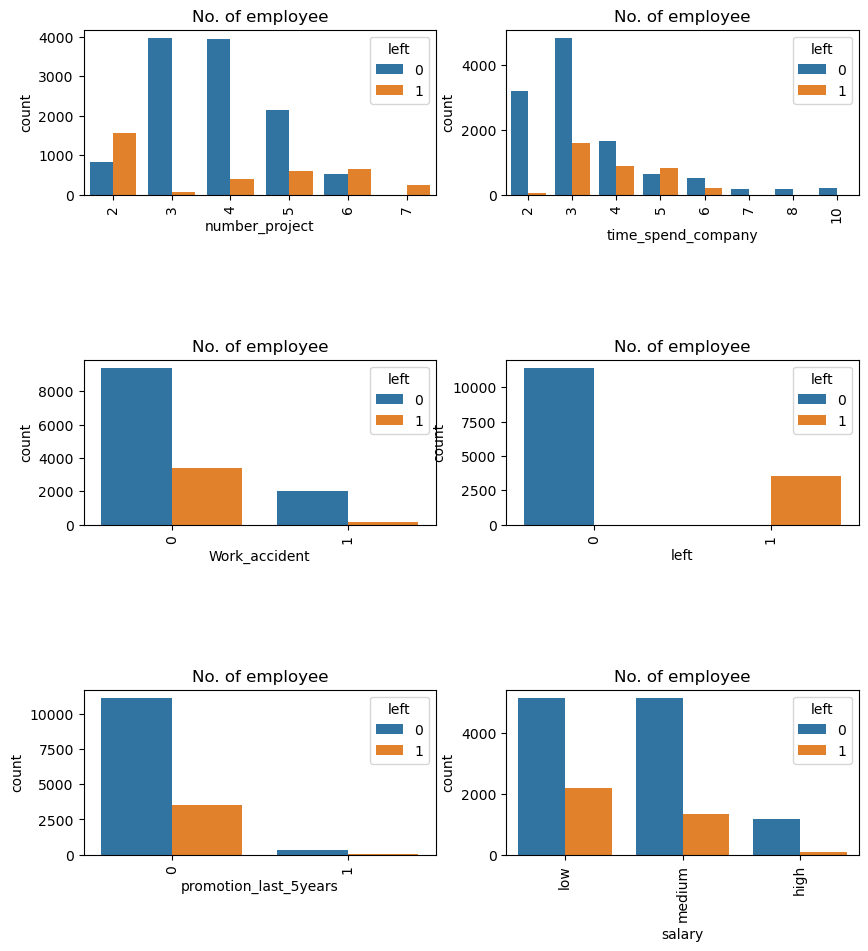

In [136]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years', 'salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [138]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [132]:
data.sales.nunique()

10

In [137]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [139]:
# one hot endcoding on these columns
cat = ["sales","salary"]
df = pd.get_dummies(data, columns = cat, drop_first=True)

In [140]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [141]:
df.shape

(14999, 19)

In [143]:
y = df["left"]
X = df.drop("left",axis = 1)

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(X)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)


In [148]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9724444444444444
Precision: 0.9610894941634242
Recall: 0.9216417910447762


In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
model = LogisticRegression()

In [151]:
model.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [152]:
prediction = model.predict(X_test)

In [159]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
# Model Precision
print("Precision:",metrics.precision_score(y_test, prediction))
# Model Recall
print("Recall:",metrics.recall_score(y_test, prediction))

Accuracy: 0.7895555555555556
Precision: 0.6006441223832528
Recall: 0.34794776119402987
